<a href="https://colab.research.google.com/github/mublify/GenAI/blob/main/1_BLIP_from_Hugging_Face_Transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers Pillow torch torchvision torchaudio

In [ ]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image

In [ ]:
processor=BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model=BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

In [ ]:
image=Image.open('image.jpg')
inputs=processor(image, return_tensors="pt")

In [ ]:
outputs=model.generate(**inputs)
caption=processor.decode(outputs[0], skip_special_tokens=True)
print(caption)

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1375: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


a man riding a motorcycle on a dirt road


### Question Answering

In [ ]:
import requests
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration

In [ ]:
processor=BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-large")
model=BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-large")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/445 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/527 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.60k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

In [ ]:
img_url='https://p1-tt.byteimg.com/origin/tos-cn-i-qvj2lq49k0/daeeda00c40b42928a1f7313e517e09f.jpg'
raw_image=Image.open(requests.get(img_url, stream=True).raw).convert('RGB')

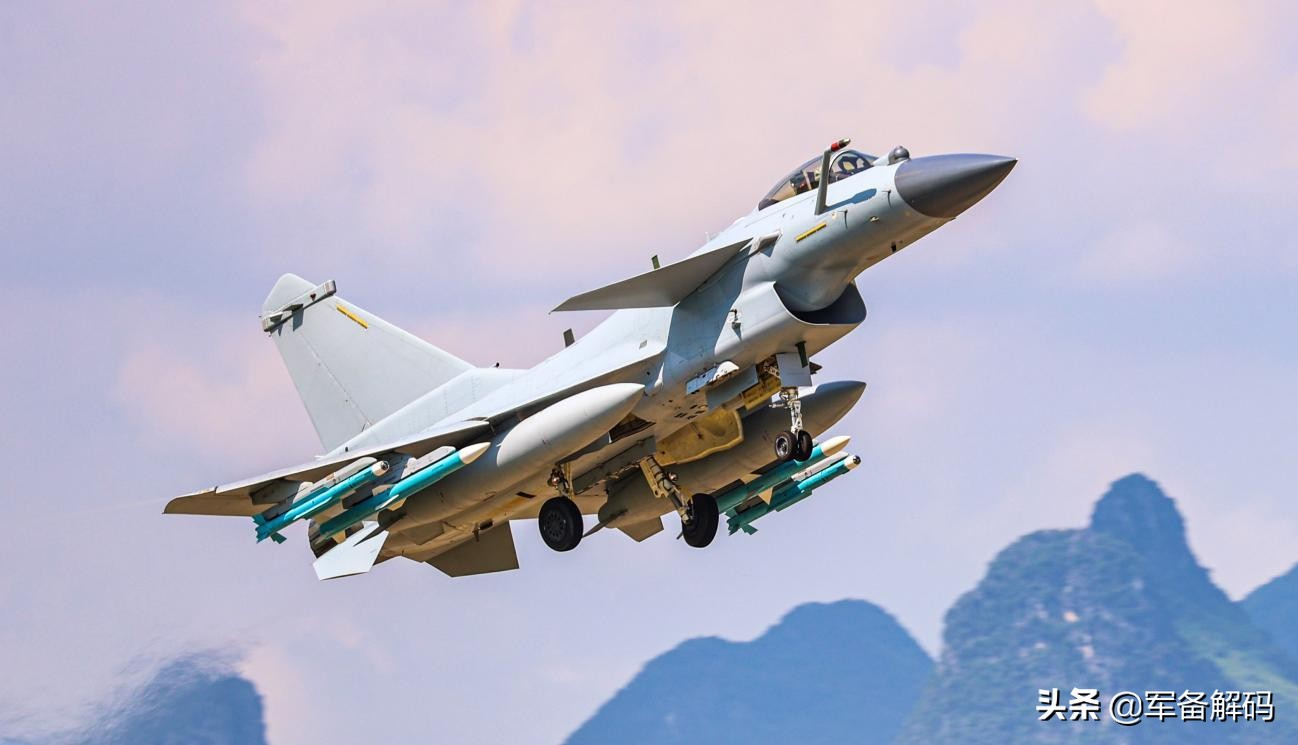

In [ ]:
raw_image

In [ ]:
question='What is in the image?'

In [ ]:
inputs=processor(raw_image, question, return_tensors="pt")
outputs=model.generate(**inputs, max_new_tokens=20)
answer=processor.decode(outputs[0], skip_special_tokens=True)
print(answer)

what is in the image? a fighter jet flying in the sky
